In [5]:
import os
import xarray as xr 
import numpy as np
import pandas as pd
#import /home/asphilli/CESM-diagnostics/CVDP-py/scripts/functions.py as func
import calendar as calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import yaml
import glob
import os.path

In [9]:
val = 202012
print(np.datetime64(val))

ValueError: Converting an integer to a NumPy datetime requires a specified unit

In [2]:
ds = xr.open_mfdataset('/project/diagnostics/external/Multi-Case/MMLEA_v2/MMLEA_Set2_quadrmEM_1950-2022/GFDL-SPEAR_r9i1p1f1.cvdp_data.1950-2022.nc',coords="minimal", compat="override", decode_times=False)
#print(ds)

In [3]:
test = ds.tas_trends_jfm
print(test)

<xarray.DataArray 'tas_trends_jfm' (lat: 72, lon: 144)>
dask.array<open_dataset-d60c8341a4029aba47ca47020b3d6de5tas_trends_jfm, shape=(72, 144), dtype=float32, chunksize=(72, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    interp_method:           conserve_order2
    units:                   C 73yr~S~-1~N~
    long_name:               tas linear trends (JFM)
    standard_name:           air_temperature
    _FillValue_original:     1.0000000200408773e+20
    missing_value_original:  1.0000000200408773e+20


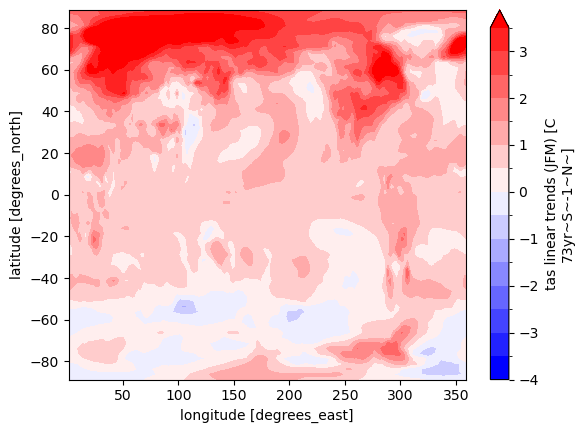

In [4]:
test.plot.contourf(cmap="bwr", levels=np.arange(-4,4,0.5))

In [5]:
plt.rcParams['font.family'] = ['FreeMono']

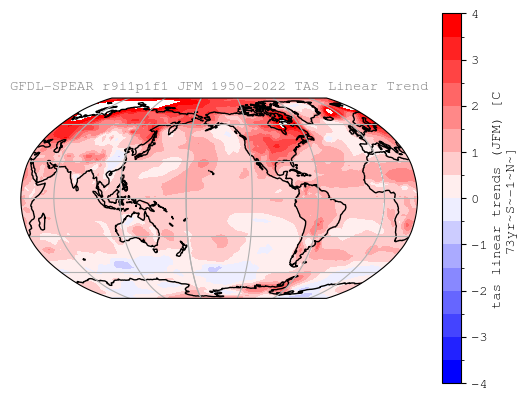

In [6]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=210))
test.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),cmap="bwr", levels=np.arange(-4,4.0000001,0.5),extend='neither')
ax.set_title('GFDL-SPEAR r9i1p1f1 JFM 1950-2022 TAS Linear Trend',fontsize=10,color="gray")
ax.coastlines()
ax.gridlines()

#plt.savefig( 'test.png', bbox_inches='tight', pad_inches=0 )

In [7]:
mpl.font_manager.get_font_names()

['MathJax_SansSerif',
 'Khmer OS System',
 'MathJax_WinChrome',
 'STIXSizeFourSym',
 'Jomolhari',
 'STIX',
 'Lohit Nepali',
 'MathJax_Typewriter',
 'STIX MathJax Size3',
 'Frank Ruehl CLM',
 'Lohit Bengali',
 'STIX MathJax Normal',
 'Carlito',
 'STIX MathJax Size1',
 'WenQuanYi Micro Hei',
 'STIX MathJax SansSerif',
 'STIXSizeTwoSym',
 'STIX MathJax Shapes',
 'Lohit Assamese',
 'URW Bookman',
 'PT Sans Narrow',
 'Lohit Punjabi',
 'cmsy10',
 'STIX MathJax Latin',
 'Madan2',
 'Meera',
 'Lohit Malayalam',
 'STIXSizeFiveSym',
 'Liberation Sans Narrow',
 'MathJax_Size1',
 'STIXNonUnicode',
 'STIX MathJax Main',
 'STIX MathJax Script',
 'DejaVu Sans',
 'STIX MathJax Marks',
 'Lohit Tamil',
 'AR PL UMing CN',
 'P052',
 'Nimbus Roman',
 'FreeSans',
 'Liberation Sans',
 'Overpass',
 'FreeMono',
 'Simple CLM',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'Waree',
 'C059',
 'MathJax_Vector',
 'STIX MathJax Size5',
 'Nimbus Sans',
 'Khmer OS Content',
 'VL Gothic',
 'DejaVu Sans Mono',
 'Lohit D

In [2]:
with open('reference_data.yaml', 'r') as f:
    data = yaml.safe_load(f)

## Instead of this syntax:
# names = []
# for entry in data['Reference Data']:
#    names.append(entry['name'])
## use this more condensed syntax that does the same thing:
# ref_names = [entry['name'] for entry in data['Reference Data']]

ref_names = [entry['name'] for entry in data['Reference Data']]
ref_paths = [entry['path'] for entry in data['Reference Data']]
ref_variable = [entry['variable'] for entry in data['Reference Data']]
ref_syear = [entry['start_year_analysis'] for entry in data['Reference Data']]
ref_eyear = [entry['end_year_analysis'] for entry in data['Reference Data']]

ref_paths

['/project/mojave/observations/OBS-SST/ersstv5.185401-202412.nc',
 '/project/mojave/observations/OBS-TAS/best.tas.185001-202401.nc',
 '/project/mojave/observations/ERA5_monthly/era5.tp.194001-202312.nc',
 '/project/mojave/observations/ERA5_monthly/era5.msl.194001-202312.nc',
 '/project/mojave/observations/OBS-PR/GPCC/gpcc.pr.10.v2022_monitoring_2021-2024.189101-202402.nc']

In [3]:
with open('simulation_data.yaml', 'r') as f:
    sdata = yaml.safe_load(f)

sim_names = [entry['name'] for entry in sdata['Simulation Data']]
sim_paths = [entry['path'] for entry in sdata['Simulation Data']]
sim_ensemble = [entry['ensemble_assign'] for entry in sdata['Simulation Data']]
sim_syear = [entry['start_year_analysis'] for entry in sdata['Simulation Data']]
sim_eyear = [entry['end_year_analysis'] for entry in sdata['Simulation Data']]

sim_paths

['/project/mojave/cesm2/LENS/*/month_1/*/*1251.001.*',
 '/project/mojave/cesm2/LENS/*/month_1/*/*1251.002.*',
 '/project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1/*_*',
 '/project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1_diff/*/',
 '/project/cas/asphilli/CVDPv6_directory_test/b20.007/']

In [8]:
#print(glob.glob('/project/mojave/cesm2/LENS/atm/month_1/*/*1251.001.*.PREC[C,L].*'))
##print(glob.glob('/project/mojave/cesm2/LENS/atm/month_1/*/*1251.001.*.["PRECC","PRECL"].*'))

fils5 = glob.glob('/project/mojave/cesm2/LENS/atm/month_1/*/*1251.001.*.PREC[C,L].*')

#fils3 = !ls /project/mojave/cesm2/LENS/{atm,ice,ocn}/month_1/*/*1251.001.**.{PRECC,PRECL}.*

print(fils5)
#print(type(fils3))

#if os.path.isfile(fils3[0]):
#    print(fils3)
    
#attempt = u+'*.'+tstring+'.*'        
#if glob.glob(attempt): #if the file(s) exist,
#    print('YES: '+attempt)
#else:
#    print('NO: '+attempt)

['/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.201501-202412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.202501-203412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.203501-204412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.204501-205412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.205501-206412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.206501-207412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.207501-208412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSSP370cmip6.f09_g17.LE2-1251.001.cam.h0.PRECC.208501-209412.nc', '/project/mojave/cesm2/LENS/atm/month_1/PRECC/b.e21.BSS

In [4]:
namelist_pr = []
namelist_psl = []
namelist_tas = []
namelist_ts = []

# create pr list, put reference data at beginning of the list
# Next: need to create namelist_pr with full info (name, path, start year, end year, ensemble. 
for i, val in enumerate(ref_variable):
    if val == 'pr':
#        print(i, val)
        namelist_pr.append(ref_names[i]+' | '+ref_paths[i]+' | '+str(ref_syear[i])+' | '+str(ref_eyear[i])+' | 0-Reference')
#        print(namelist_pr)
    if val == 'psl':
        namelist_psl.append(ref_names[i]+' | '+ref_paths[i]+' | '+str(ref_syear[i])+' | '+str(ref_eyear[i])+' | 0-Reference')
    if val == 'tas':
        namelist_tas.append(ref_names[i]+' | '+ref_paths[i]+' | '+str(ref_syear[i])+' | '+str(ref_eyear[i])+' | 0-Reference')
    if val == 'ts':
        namelist_ts.append(ref_names[i]+' | '+ref_paths[i]+' | '+str(ref_syear[i])+' | '+str(ref_eyear[i])+' | 0-Reference')

In [5]:
vari = 'prect'

if vari == 'prect':
    vname = ("PRECT","PRECC","pr","PPT","ppt","p","P","precip","PRECIP","tp","prcp","prate")
if vari == 'psl':
    vname = ("PSL","psl","slp","SLP","prmsl","msl","slp_dyn")    
if vari == 'trefht':
    vname = ("TREFHT","tas","temp","air","temperature_anomaly","temperature","t2m","t_ref","T2","tempanomaly")    
if vari == 'ts':
    vname = ("TS","ts","sst","t_surf","skt")    
if vari == 'ssh':
    vname = ("SSH","zos","ssh")     

# Search #1: Add *.PRECC.* to end of path and search
#    IF files found, check for if PRECC, then need to add coding to do both PRECC and PRECL
# Search #2: replace all instances of /*/ with /{PRECC,PRECL}/ or /PRECT/, replace all instances of "/*_" with "/PRECT_"
# Search #3: replace all instances of /*/ with /{PRECC,PRECL}/ or /PRECT/, replace all instances of "/*_" with "/PRECT_", add PRECT_* to end of path
# Search #4: replace all instances of /*/ with /{PRECC,PRECL}/ or /PRECT/, replace all instances of "/*_" with "/PRECT_", add PRECT.* to end of path

if os.path.isfile('namelist_pr'):
    os. remove('namelist_pr')
    print('namelist_pr has been removed')

cntr = -1
for u in sim_paths:
    cntr = cntr+1
#    print('----------------------------------')
#    print(' Analyzing '+u)
    tempstr = sim_names[cntr]+' | missing | '+str(sim_syear[cntr])+' | '+str(sim_eyear[cntr])+' | '+str(sim_ensemble[cntr])
    
    for v in vname:      # loop over each entry in vname until files are found
        if v == "PRECC":
            tstring = 'PREC[C,L]'
            tstring2 = 'PREC'
        else:
            tstring = v      
            tstring2 = v
        
        attempt = u+'*.'+tstring+'.*'   # Attempt 1
#        print('Attempt 1 '+attempt)
        fils1 = glob.glob(attempt)
        if fils1:
            if all(tstring2 in sub for sub in fils1):
                tempstr = sim_names[cntr]+' | '+attempt+' | '+str(sim_syear[cntr])+' | '+str(sim_eyear[cntr])+' | '+str(sim_ensemble[cntr])
                break

        u2 = u.replace('/*/', '/'+tstring+'/')   #Attempt 2
        attempt = u2.replace('/*_', '/'+tstring+'_')+'*.nc'
#        print('Attempt 2 '+attempt)
        fils2 = glob.glob(attempt)
        if fils2:
            if all(tstring2 in sub for sub in fils2):
                tempstr = sim_names[cntr]+' | '+attempt+' | '+str(sim_syear[cntr])+' | '+str(sim_eyear[cntr])+' | '+str(sim_ensemble[cntr])
                break                  
            
        u3 = u.replace('/*/', '/'+tstring+'/')   #Attempt 3
        attempt = u3.replace('/*_', '/'+tstring+'_')+'_*.nc'
#        print('Attempt 3 '+attempt)
        fils3 = glob.glob(attempt)
        if fils3:
            if all(tstring2 in sub for sub in fils3):
                tempstr = sim_names[cntr]+' | '+attempt+' | '+str(sim_syear[cntr])+' | '+str(sim_eyear[cntr])+' | '+str(sim_ensemble[cntr])
                break                        
    
        attempt = u+tstring+'.*.nc'   # Attempt 4
#        print('Attempt 4 '+attempt)
        fils4 = glob.glob(attempt)
        if fils4:
            if all(tstring2 in sub for sub in fils4):
                tempstr = sim_names[cntr]+' | '+attempt+' | '+str(sim_syear[cntr])+' | '+str(sim_eyear[cntr])+' | '+str(sim_ensemble[cntr])
                break

#    print('Appending: '+tempstr)
    namelist_pr.append(tempstr)
                
with open('namelist_pr', 'w') as f:
    for line in namelist_pr:
        f.write(f"{line}\n")
        


namelist_pr has been removed
----------------------------------
 Analyzing /project/mojave/cesm2/LENS/*/month_1/*/*1251.001.*
----------------------------------
 Analyzing /project/mojave/cesm2/LENS/*/month_1/*/*1251.002.*
----------------------------------
 Analyzing /project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1/*_*
['/project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1/pr_Amon_CanESM5_historical_r14i1p1f1_gn_185001-201412.nc', '/project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1/pr_Amon_CanESM5_ssp585_r14i1p1f1_gn_201501-210012.nc']
----------------------------------
 Analyzing /project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1_diff/*/
['/project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1_diff/pr/pr_Amon_CanESM5_historical_r14i1p1f1_gn_185001-201412.nc', '/project/cas/asphilli/CVDPv6_directory_test/CanESM5_r14i1p1f1_diff/pr/pr_Amon_CanESM5_ssp585_r14i1p1f1_gn_201501-210012.nc']
----------------------------------
 Analyzing /proj

In [13]:
help(glob.glob)

Help on function glob in module glob:

glob(pathname, *, recursive=False)
    Return a list of paths matching a pathname pattern.
    
    The pattern may contain simple shell-style wildcards a la
    fnmatch. However, unlike fnmatch, filenames starting with a
    dot are special cases that are not matched by '*' and '?'
    patterns.
    
    If recursive is true, the pattern '**' will match any files and
    zero or more directories and subdirectories.

